In [ ]:
import sys
import pandas as pd
import numpy as np
import plotly.express as px
import os
from datetime import datetime

### Loading datasets

In [ ]:
# Dataset obesity: https://www.who.int/data/gho/data/indicators/indicator-details/GHO/prevalence-of-obesity-among-adults-bmi--30-(crude-estimate)-(-)
# Dataset food balance: https://www.fao.org/faostat/en/#data/FBS
fb_path = "FoodBalanceSheets_E_All_Data_NOFLAG.csv"
ob_path = "Obesity_Among_Adults.csv"

fb = pd.read_csv(fb_path, low_memory=False)
ob = pd.read_csv(ob_path, low_memory=False)

print("FoodBalance shape:", fb.shape)
print("Obesity shape:", ob.shape)

display(fb.head())
display(ob.head())

FoodBalance shape: (373670, 23)
Obesity shape: (19701, 34)


,Area Code,Area Code (M49),Area,Item Code,Item Code (FBS),Item,Element Code,Element,Unit,Y2010,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
0,2,'004,Afghanistan,2501,'S2501,Population,511,Total Population - Both sexes,1000 No,28284.09,...,32792.52,33831.76,34700.61,35688.93,36743.04,37856.12,39068.98,40000.41,40578.84,41454.76
1,2,'004,Afghanistan,2901,'S2901,Grand Total,664,Food supply (kcal/capita/day),kcal/cap/d,2200.21,...,2270.45,2251.27,2240.71,2307.21,2261.79,2223.10,2259.95,2244.73,2268.63,2314.63
2,2,'004,Afghanistan,2901,'S2901,Grand Total,661,Food supply (kcal),million Kcal,22714261.33,...,27175651.99,27799992.36,28380157.97,30054816.91,30333352.71,30717599.09,32227343.15,32773345.26,33601287.96,35022662.41
3,2,'004,Afghanistan,2901,'S2901,Grand Total,674,Protein supply quantity (g/capita/day),g/cap/d,65.54,...,65.55,63.93,64.82,65.33,62.84,60.84,63.21,61.36,61.55,62.58
4,2,'004,Afghanistan,2901,'S2901,Grand Total,671,Protein supply quantity (t),t,676666.08,...,784625.74,789385.73,820992.96,851041.58,842749.06,840696.76,901388.20,895904.37,911681.15,946916.80


,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,AFR,Africa,Country,ETH,Ethiopia,Year,2022,...,NaN,NaN,0.60,NaN,1.69,1.1 [0.6-1.7],NaN,NaN,EN,2024-02-29T00:00:00.000Z
1,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,SEAR,South-East Asia,Country,TLS,Timor-Leste,Year,2022,...,NaN,NaN,0.87,NaN,2.54,1.6 [0.9-2.5],NaN,NaN,EN,2024-02-29T00:00:00.000Z
2,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,AFR,Africa,Country,RWA,Rwanda,Year,2022,...,NaN,NaN,1.16,NaN,2.56,1.8 [1.2-2.6],NaN,NaN,EN,2024-02-29T00:00:00.000Z
3,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,WPR,Western Pacific,Country,VNM,Viet Nam,Year,2022,...,NaN,NaN,1.26,NaN,2.77,1.9 [1.3-2.8],NaN,NaN,EN,2024-02-29T00:00:00.000Z
4,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,EMR,Eastern Mediterranean,Country,YEM,Yemen,Year,2022,...,NaN,NaN,6.01,NaN,15.78,10.1 [6.0-15.8],NaN,NaN,EN,2024-02-29T00:00:00.000Z


### Analysing:
Examined the Element column to understand the different measurement types available in the dataset.

In [ ]:
# disaply all the unique elements in food balance
print("FoodBalance Elements:")
print(fb['Element'].unique())

FoodBalance Elements:
['Total Population - Both sexes' 'Food supply (kcal/capita/day)'
 'Food supply (kcal)' 'Protein supply quantity (g/capita/day)'
 'Protein supply quantity (t)' 'Fat supply quantity (g/capita/day)'
 'Fat supply quantity (t)' 'Production' 'Import quantity'
 'Stock Variation' 'Export quantity' 'Domestic supply quantity' 'Feed'
 'Seed' 'Losses' 'Processing' 'Other uses (non-food)' 'Residuals' 'Food'
 'Food supply quantity (kg/capita/yr)' 'Tourist consumption']


Identified all columns beginning with ‘Y’, which correspond to annual values such as Y2010, Y2019.

In [ ]:
# display all years present in year column
year_cols = [c for c in fb.columns if c.startswith('Y')]
print("\nYear columns detected:", year_cols)


Year columns detected: ['Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022', 'Y2023']


### Reshaping

In [ ]:
# melt years to rows
fb_long = fb.melt(
    id_vars=['Area', 'Area Code', 'Item', 'Element', 'Unit'],
    value_vars=year_cols,
    var_name='year_col',
    value_name='value'
)

# Add new column 'year' and the values are converted form year_col column (convert Y2010 to 2010 (as integer))
fb_long['year'] = fb_long['year_col'].str.replace('Y', '').astype(int)

fb_long.head()

,Area,Area Code,Item,Element,Unit,year_col,value,year
0,Afghanistan,2,Population,Total Population - Both sexes,1000 No,Y2010,28284.09,2010
1,Afghanistan,2,Grand Total,Food supply (kcal/capita/day),kcal/cap/d,Y2010,2200.21,2010
2,Afghanistan,2,Grand Total,Food supply (kcal),million Kcal,Y2010,22714261.33,2010
3,Afghanistan,2,Grand Total,Protein supply quantity (g/capita/day),g/cap/d,Y2010,65.54,2010
4,Afghanistan,2,Grand Total,Protein supply quantity (t),t,Y2010,676666.08,2010


In [ ]:
# select relevant Elements (Food supply and Total Population)
mask_kcal = fb_long['Element'] == 'Food supply (kcal/capita/day)'
mask_pop = fb_long['Element'] == 'Total Population - Both sexes'

kcal_df = fb_long[mask_kcal].copy()
pop_df = fb_long[mask_pop].copy()

display(kcal_df.head())
display(pop_df.head())

,Area,Area Code,Item,Element,Unit,year_col,value,year
1,Afghanistan,2,Grand Total,Food supply (kcal/capita/day),kcal/cap/d,Y2010,2200.21,2010
7,Afghanistan,2,Vegetal Products,Food supply (kcal/capita/day),kcal/cap/d,Y2010,2000.82,2010
13,Afghanistan,2,Animal Products,Food supply (kcal/capita/day),kcal/cap/d,Y2010,199.39,2010
32,Afghanistan,2,Cereals - Excluding Beer,Food supply (kcal/capita/day),kcal/cap/d,Y2010,1648.94,2010
50,Afghanistan,2,Wheat and products,Food supply (kcal/capita/day),kcal/cap/d,Y2010,1464.44,2010


,Area,Area Code,Item,Element,Unit,year_col,value,year
0,Afghanistan,2,Population,Total Population - Both sexes,1000 No,Y2010,28284.09,2010
1620,Albania,3,Population,Total Population - Both sexes,1000 No,Y2010,2928.72,2010
3263,Algeria,4,Population,Total Population - Both sexes,1000 No,Y2010,36188.24,2010
4907,Angola,7,Population,Total Population - Both sexes,1000 No,Y2010,23294.83,2010
6603,Antigua and Barbuda,8,Population,Total Population - Both sexes,1000 No,Y2010,85.32,2010


In [ ]:
# rename and reduce columns
kcal_df = kcal_df[['Area', 'year', 'value']].rename(columns={'value': 'kcal_per_capita', 'Area':'Location'})
pop_df = pop_df[['Area', 'year', 'value']].rename(columns={'value': 'population', 'Area':'Location'})

display(kcal_df.head())
display(pop_df.head())

,Location,year,kcal_per_capita
1,Afghanistan,2010,2200.21
7,Afghanistan,2010,2000.82
13,Afghanistan,2010,199.39
32,Afghanistan,2010,1648.94
50,Afghanistan,2010,1464.44


,Location,year,population
0,Afghanistan,2010,28284.09
1620,Albania,2010,2928.72
3263,Algeria,2010,36188.24
4907,Angola,2010,23294.83
6603,Antigua and Barbuda,2010,85.32


In [ ]:
# convert numeric and handle missing (If a value cannot be converted like empty or text becomes NaN)
kcal_df['kcal_per_capita'] = pd.to_numeric(kcal_df['kcal_per_capita'], errors='coerce')
pop_df['population'] = pd.to_numeric(pop_df['population'], errors='coerce')

print("kcal rows:", kcal_df.shape)
print("population rows:", pop_df.shape)

kcal rows: (327418, 3)
population rows: (2982, 3)


### Filtering

In [ ]:
# filtering dataset with obesity indicator
ob_ind = ob[ob['Indicator'].str.contains('Prevalence of obesity among adults', na=False)].copy()
ob_ind.shape

(19701, 34)

In [ ]:
# Keep only 'Both sexes' overall measure (Dim1 == 'Both sexes') and period as year
ob_both = ob_ind[ob_ind['Dim1'] == 'Both sexes'].copy()
ob_both.shape

(6567, 34)

In [ ]:
# convert values of period column to numeric values
ob_both['Period'] = pd.to_numeric(ob_both['Period'], errors='coerce').astype('Int64')  # may contain NA
ob_both['Period'].unique()

<IntegerArray>
[2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
 1996, 1995, 1994, 1993, 1992, 1991, 1990]
Length: 33, dtype: Int64

In [ ]:
# convert values of FactValueNumeric column to numeric values (invalid values turned into NaN)
ob_both['FactValueNumeric'] = pd.to_numeric(ob_both['FactValueNumeric'], errors='coerce')
ob_both['FactValueNumeric'].unique()

array([10.21, 10.26, 10.56, ...,  8.47,  8.64,  8.72], shape=(3240,))

In [ ]:
print("Obesity rows beofer filtering:", ob.shape)
print("Obesity rows after filtering:", ob_df.shape)
ob_df.head(10)

Obesity rows beofer filtering: (19701, 34)
Obesity rows after filtering: (6567, 3)


,Location,year,obesity_pct
7,Senegal,2022,10.21
9,Mozambique,2022,10.26
10,Sri Lanka,2022,10.56
11,Haiti,2022,10.69
12,Democratic People's Republic of Korea,2022,10.80
14,Zambia,2022,11.08
16,Benin,2022,11.17
17,Indonesia,2022,11.23
18,Djibouti,2022,11.35
22,Mali,2022,11.37


### Merging

In [ ]:
# joining kcal and population (by Location & year)
kp = pd.merge(kcal_df, pop_df, on=['Location','year'], how='left')
kp.head()

,Location,year,kcal_per_capita,population
0,Afghanistan,2010,2200.21,28284.09
1,Afghanistan,2010,2000.82,28284.09
2,Afghanistan,2010,199.39,28284.09
3,Afghanistan,2010,1648.94,28284.09
4,Afghanistan,2010,1464.44,28284.09


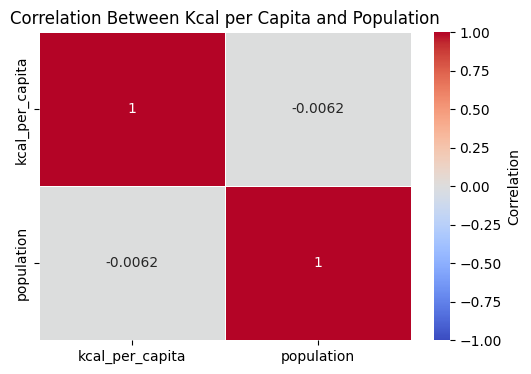

In [ ]:
# Heatmap for correlation between kcal_per_capita and population
import seaborn as sns
import matplotlib.pyplot as plt

# Copying kcal_per_capita and population
corr_vars = kp[['kcal_per_capita', 'population']].copy()

# Converting values of the two variables to numeric
corr_vars = corr_vars.apply(pd.to_numeric, errors='coerce')
corr_matrix = corr_vars.corr()

# Plotting heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)

plt.title("Correlation Between Kcal per Capita and Population")
plt.show()

In [ ]:
# merge obesity data
merged = pd.merge(kp, ob_df, on=['Location','year'], how='left')
display(merged.head())
merged.shape

,Location,year,kcal_per_capita,population,obesity_pct
0,Afghanistan,2010,2200.21,28284.09,8.95
1,Afghanistan,2010,2000.82,28284.09,8.95
2,Afghanistan,2010,199.39,28284.09,8.95
3,Afghanistan,2010,1648.94,28284.09,8.95
4,Afghanistan,2010,1464.44,28284.09,8.95


(327418, 5)

In [ ]:
# Keep only rows with both kcal and obesity present
merged_clean = merged.dropna(subset=['kcal_per_capita','obesity_pct']).copy()
display(merged_clean.head())
merged_clean.shape

,Location,year,kcal_per_capita,population,obesity_pct
0,Afghanistan,2010,2200.21,28284.09,8.95
1,Afghanistan,2010,2000.82,28284.09,8.95
2,Afghanistan,2010,199.39,28284.09,8.95
3,Afghanistan,2010,1648.94,28284.09,8.95
4,Afghanistan,2010,1464.44,28284.09,8.95


(228463, 5)

In [ ]:
# keep reasonable ranges: kcal > 0, obesity between 0 and 100
merged_clean = merged_clean[(merged_clean['kcal_per_capita']>0) & (merged_clean['obesity_pct']>=0) & (merged_clean['obesity_pct']<=100)]
display(merged_clean.head())
print("Merged and cleaned rows (kcal + obesity):", merged_clean.shape)

,Location,year,kcal_per_capita,population,obesity_pct
0,Afghanistan,2010,2200.21,28284.09,8.95
1,Afghanistan,2010,2000.82,28284.09,8.95
2,Afghanistan,2010,199.39,28284.09,8.95
3,Afghanistan,2010,1648.94,28284.09,8.95
4,Afghanistan,2010,1464.44,28284.09,8.95


Merged and cleaned rows (kcal + obesity): (210956, 5)


In [ ]:
# convert population column into numeric
merged_clean['population'] = pd.to_numeric(merged_clean['population'], errors='coerce')
# if population missing, set to small number to keep dot visible
merged_clean['population'] = merged_clean['population'].fillna(1_000)

### Plotting

In [ ]:
# Normalising population size for plotting bubble
merged_clean['size'] = (merged_clean['population'] ** 0.5) / 100
merged_clean.head()

,Location,year,kcal_per_capita,population,obesity_pct,size
0,Afghanistan,2010,2200.21,28284.09,8.95,1.681787
1,Afghanistan,2010,2000.82,28284.09,8.95,1.681787
2,Afghanistan,2010,199.39,28284.09,8.95,1.681787
3,Afghanistan,2010,1648.94,28284.09,8.95,1.681787
4,Afghanistan,2010,1464.44,28284.09,8.95,1.681787


In [ ]:
# list of countries present
countries = merged_clean['Location'].unique()
print("Number of countries in merged dataset:", len(countries))
print("Year range:", merged_clean['year'].min(), "-", merged_clean['year'].max())

Least populated countries:
 ['Tuvalu', 'Nauru', 'Marshall Islands', 'Saint Kitts and Nevis', 'Antigua and Barbuda', 'Tonga', 'Saint Vincent and the Grenadines', 'Seychelles', 'Micronesia (Federated States of)', 'Grenada']
Most populated countries:
 ['Mexico', 'Russian Federation', 'Bangladesh', 'Nigeria', 'Brazil', 'Pakistan', 'Indonesia', 'United States of America', 'India', 'China']
Filtered rows: (21361, 6)


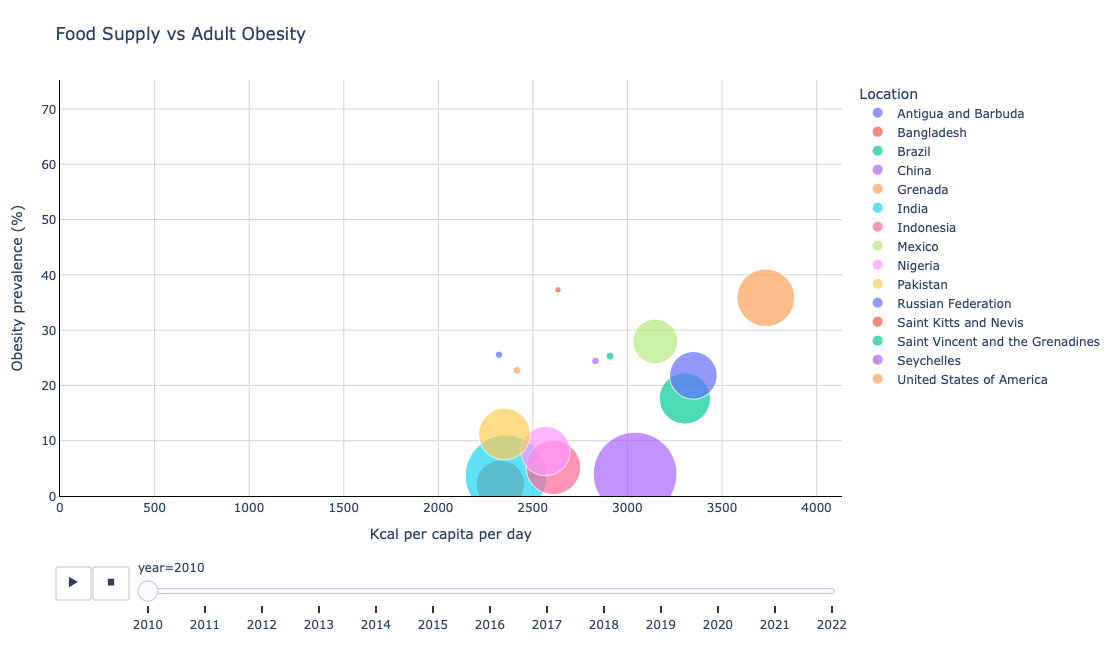

In [ ]:
# Average population per country
avg_pop = (
    merged_clean.groupby('Location')['population'] # group all rows by country and select population column of each country
    .mean()
    .sort_values()
)

# Select n least and most populated countries
least = avg_pop.head(10).index.tolist()
top = avg_pop.tail(10).index.tolist()

selected_countries = least + top
print("Least populated countries:\n", least)
print("Most populated countries:\n", top)

# Filter dataset for only those 20 countries
filtered = merged_clean[merged_clean['Location'].isin(selected_countries)].copy()

print("Filtered rows:", filtered.shape)

# Animated scatter plot
fig = px.scatter(
    filtered,
    x='kcal_per_capita',
    y='obesity_pct',
    animation_frame='year',
    animation_group='Location',
    size='size',
    size_max=60,
    color='Location',  # helpful to distinguish the 10 countries
    hover_name='Location',
    hover_data={'kcal_per_capita': True, 'obesity_pct': True, 'population': True, 'size': False},
    title='Food Supply vs Adult Obesity',
    labels={'kcal_per_capita':'Kcal per capita per day','obesity_pct':'Obesity prevalence (%)'},
    height=600,
    width=900
)

fig.update_xaxes(range=[filtered['kcal_per_capita'].min()*0.9, filtered['kcal_per_capita'].max()*1.05])
fig.update_yaxes(range=[0, max(filtered['obesity_pct'].max()*1.05, 40)])

fig.update_layout(
    width=950,
    height=650,
    plot_bgcolor="white",
    xaxis=dict(
        showline=True,
        linewidth=1,
        linecolor="black",
        gridcolor="lightgrey"
    ),
    yaxis=dict(
        showline=True,
        linewidth=1,
        linecolor="black",
        gridcolor="lightgrey"
    ),
    coloraxis_colorbar=dict(
        title="Wealth per capita (US$)"
    ),
    margin=dict(l=60, r=20, t=80, b=60)
)

fig.show()


In [ ]:
import plotly.io as pio
pio.write_html(fig, file='animation.html')